<a href="https://colab.research.google.com/github/Aldistwn29/Projek_data_analyst/blob/main/Business_Decision_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Prepration

In [51]:
import pandas
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv ', sep=';')

df.head(5)

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [21]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [53]:
# Merubah 2 tabel menjadi tipe datetime
df['First_Transaction'] = pd.to_datetime(df['First_Transaction'] / 1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction'] / 1000, unit='s', origin='1970-01-01')

In [54]:
# Pengecekan transaksaksi terakhir dalam dataset
transaksi_terakhir = max(df['Last_Transaction'])
print(transaksi_terakhir)

2019-02-01 23:57:57.286000128


In [55]:
# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [56]:
# menghapus kolom yg tidak digunakan menggunakan fungsi bawaan python
del df['no']
del df['Row_Num']

In [57]:
# membuat visualisasi data berupa trend of customer acquisition by year dengan meggunakan bar chart.
# kolom tahun transaksi pertama
df['year_frist_transaksi'] = df['First_Transaction'].dt.year
# kolom tahun teransaksi terakhir
df['year_last_transaksi'] = df['Last_Transaction'].dt.year
df.head(5)

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,year_frist_transaksi,year_last_transaksi
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False,2015,2018


# Data Visualisasi

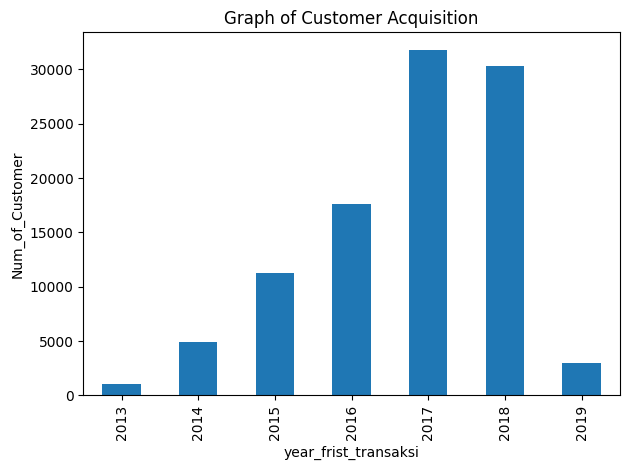

In [58]:
import matplotlib.pyplot as plt

df_year = df.groupby(['year_frist_transaksi'])['Customer_ID'].count()
df_year.plot(x='year_frist_transaksi', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('year_frist_transaksi')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

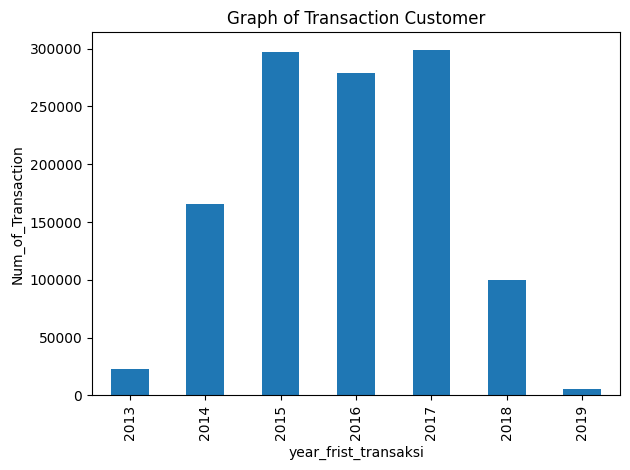

In [60]:
plt.clf()
df_year = df.groupby(['year_frist_transaksi'])['Count_Transaction'].sum()
df_year.plot(x='year_frist_transaksi', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('year_frist_transaksi')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

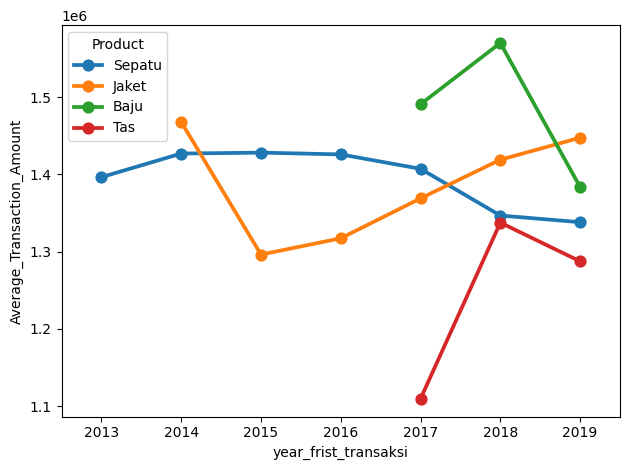

In [61]:
# Average transaction amount by year
import seaborn as sns

plt.clf()

sns.pointplot(data=df.groupby(['Product', 'year_frist_transaksi']).mean().reset_index(),
              x='year_frist_transaksi',
              y='Average_Transaction_Amount',
              hue='Product')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

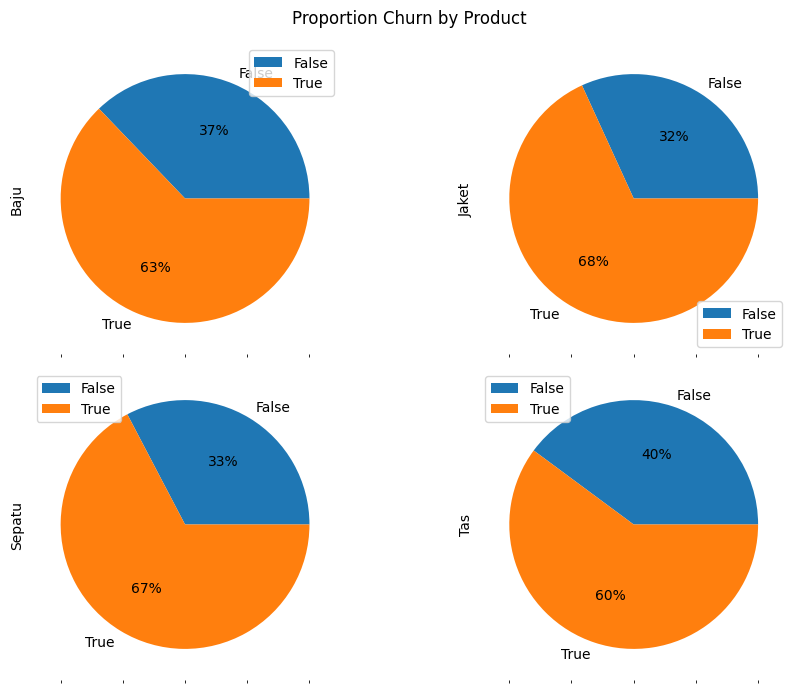

In [73]:
# Proporsi churned customer untuk setiap produk
# Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart. Visualisasikan pie chartnya untuk keempat produk yang dimaksudkan.

# Pie chart yang diinginkan seperti berikut ini:

plt.clf()
df_piv = df.pivot_table(index='is_churn',
                        columns='Product',
                        values='Customer_ID',
                        aggfunc='count',
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# plot pie chartnya
df_div = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

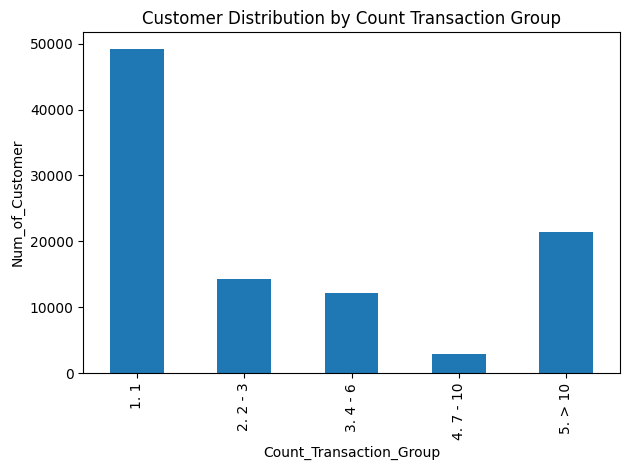

In [76]:
# Distribusi kategorisasi count transaction
# Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi seperti yang diperlihatkan oleh tabel berikut:
# # Kategorisasi jumlah transaksi
plt.clf()
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <=3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <=6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <=10):
        val ='4. 7 - 10'
    else:
        val ='5. > 10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
 7   year_frist_transaksi        100000 non-null  int32         
 8   year_last_transaksi         100000 non-null  int32         
 9   Count_Transaction_Group     100000 non-null  object        
dtypes: datetime64[ns](2), int32(2), int64(3), object(3)
memory usage: 6.9+ MB


In [78]:
df.head(5)

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,year_frist_transaksi,year_last_transaksi,Count_Transaction_Group
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False,2016,2018,5. > 10
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False,2014,2018,5. > 10
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019,5. > 10
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False,2017,2019,5. > 10
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False,2015,2018,5. > 10
